Copyright (c) 2017-2020 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Cross Section Reader/Plotter

## Basic Operation

Firstly, to get started plotting some cross sections from Serpent, you generate a yourInputFileName_xs.m file using [set xsplot](http://serpent.vtt.fi/mediawiki/index.php/Input_syntax_manual#set_xsplot) as documented on the Serpent wiki. `serpentTools` can then read the output, figuring out its filetype automatically as with other readers. Let's plot some data used in the `serpentTools` regression suite.

In [1]:
import serpentTools
%matplotlib inline

xsreader = serpentTools.readDataFile('plut_xs0.m')

This file contains some cross sections from a Serpent case containing a chunk of plutonium metal reflected by beryllium. Let's see what cross sections are available from the file:

In [2]:
xsreader.xsections

{'i4009_03c': <serpentTools.objects.xsdata.XSData at 0x7f4fb94c28e0>,
 'i7014_03c': <serpentTools.objects.xsdata.XSData at 0x7f4fb94c22e0>,
 'i8016_03c': <serpentTools.objects.xsdata.XSData at 0x7f4fa26b42b0>,
 'i94239_03c': <serpentTools.objects.xsdata.XSData at 0x7f4fa26b43a0>,
 'i82206_09c_bra': <serpentTools.objects.xsdata.XSData at 0x7f4fa26b4310>,
 'mbe': <serpentTools.objects.xsdata.XSData at 0x7f4fa26b40d0>,
 'mfissile': <serpentTools.objects.xsdata.XSData at 0x7f4fa26b40a0>}

In [3]:
xsreader.keys()

dict_keys(['i4009_03c', 'i7014_03c', 'i8016_03c', 'i94239_03c', 'i82206_09c_bra', 'mbe', 'mfissile'])

Notice that the important part of the reader is the `xsections` attribute, which contains a dictionary of named XSData objects. Entries starting with "i" are isotopes, while "m" preceded names are materials. Notably, materials not appearing in the neutronics calculation, e.g., external tanks in Serpent continuous reprocessing calculations, are not printed in the yourInputFileName_xs.m file.

These `XSData` instances can be obtained by indexing into the `xsection` dictionary, or the reader directly.

In [4]:
# Check that the two entries stored are identical objects in memory
assert xsreader.xsections['i4009_03c'] is xsreader["i4009_03c"]

The final bit of useful information stored on the reader are the energy groups and majorant cross section. The energy groups are shared across all the `XSData` objects stored on the reader.

In [5]:
xsreader.energies

array([1.00000e-08, 1.03891e-07, 1.07934e-06, 1.12135e-05, 1.16498e-04,
       1.21032e-03, 1.25742e-02, 1.30635e-01, 1.35719e+00, 1.41000e+01])

In [6]:
xsreader.majorant

array([78.4253  , 36.1666  ,  2.54417 , 13.0654  ,  4.27811 ,  0.822536,
        0.781066,  0.598564,  0.34175 ,  0.293887])

## Data access
Most of the useful information is stored on the `XSData` objects. These are primarily cross sections provided by Serpent and some descriptive data. The `MT` and `MTdescrip` attributes describe the ordering of reactions and their descriptions

In [7]:
o16 = xsreader["i8016_03c"]

In [8]:
# Make a quick dictionary to show the descriptions
dict(zip(o16.MT, o16.MTdescrip))

{1: 'Total',
 101: 'Sum of absorption',
 2: 'elastic scattering',
 102: '(n,gamma)',
 107: '(n,alpha)',
 51: 'inelastic scatt. to 1. excited state',
 52: 'inelastic scatt. to 2. excited state',
 53: 'inelastic scatt. to 3. excited state',
 54: 'inelastic scatt. to 4. excited state',
 22: '(n,nalpha)',
 55: 'inelastic scatt. to 5. excited state',
 91: 'inelastic scattering to continuum',
 103: '(n,p)',
 104: '(n,d)',
 56: 'inelastic scatt. to 6. excited state',
 57: 'inelastic scatt. to 7. excited state',
 28: '(n,np)',
 108: '(n,2alpha)',
 105: '(n,t)',
 23: '(n,n3alpha)',
 16: '(n,2n)'}

Cross section data are stored in the `xsdata` array, which has shape `(N_E, N_MT)`

In [9]:
assert o16.xsdata.shape == (len(o16.energies), len(o16.MT))

The data can be obtained in a few different ways. First, you can index into the `xsdata` array directly

In [10]:
o16.xsdata[:, 0]

array([4.16597, 3.88237, 3.85502, 3.8523 , 3.8518 , 3.84938, 3.82434,
       3.58676, 3.19656, 1.593  ])

This implies you know the position of your reaction. Alternatively, you can index directly into the `XSData` object using the reaction MT as a key

In [11]:
o16[1]

array([4.16597, 3.88237, 3.85502, 3.8523 , 3.8518 , 3.84938, 3.82434,
       3.58676, 3.19656, 1.593  ])

The `tabulate` method can be used to create a pandas `DataFrame` for nice tabular representation

In [12]:
xsreader.xsections['mfissile'].tabulate()

,Energy (MeV),MT -1 cm$^{-1}$,MT -3 cm$^{-1}$,MT -2 cm$^{-1}$,MT -6 cm$^{-1}$,MT -7 cm$^{-1}$,MT -16 cm$^{-1}$
0,1.000000e-08,78.425300,0.404950,19.669800,58.350500,167.674000,0.000000
1,1.038910e-07,36.166600,0.369643,12.045000,23.752000,68.055800,0.000000
2,1.079340e-06,2.544170,0.506089,0.410559,1.627520,4.672940,0.000000
3,1.121350e-05,13.065400,0.715384,2.015980,10.334000,29.525000,0.000000
4,1.164980e-04,4.278110,0.721668,0.434122,3.122320,9.000070,0.000000
5,1.210320e-03,0.822536,0.537059,0.003514,0.281963,0.814254,0.000000
6,1.257420e-02,0.781066,0.623379,0.047729,0.093854,0.271066,0.000000
7,1.306350e-01,0.583509,0.458020,0.010805,0.075165,0.217468,0.000000
8,1.357190e+00,0.341750,0.163555,0.000772,0.095130,0.291685,0.000000
9,1.410000e+01,0.293887,0.136424,0.000114,0.120609,0.596505,0.012848


Lastly, the descriptions for the reaction MTs can be found in `MTdescrip` or using `describe`

In [13]:
o16.MTdescrip[0]

'Total'

In [14]:
o16.describe(1)

'Total'

## Plotting
Plotting reactions is provided through the `plot` method. With no MTs provided, all reactions are plotted and labeled.

In [15]:
be9 = xsreader["i4009_03c"]

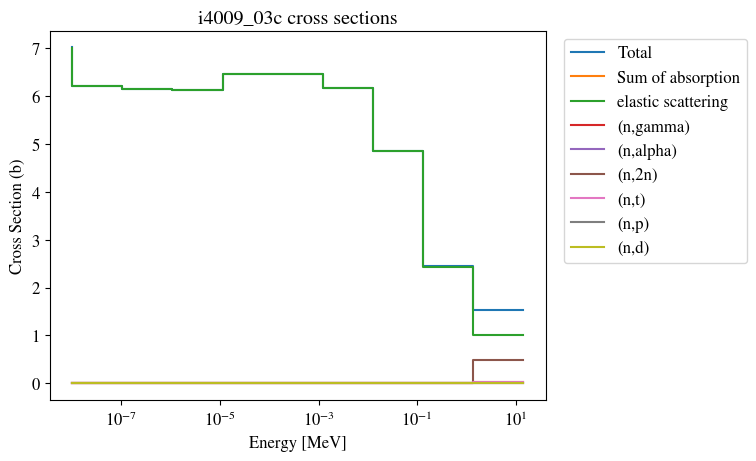

In [16]:
be9.plot(legend='right');

This is nice to have an automatically generated legend, but gets somewhat busy quickly. So, it's easy to check which MT numbers are available, and plot only a few:

In [17]:
be9.showMT()

MT numbers available for i4009_03c:
-----------------------------------
1   Total
101 Sum of absorption
2   elastic scattering
102 (n,gamma)
107 (n,alpha)
16  (n,2n)
105 (n,t)
103 (n,p)
104 (n,d)



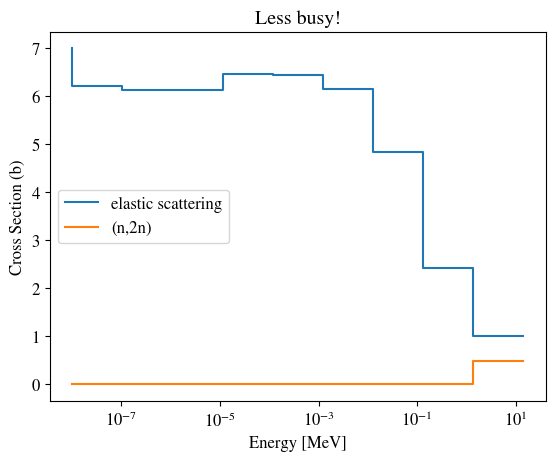

In [18]:
be9.plot(mts=[2, 16], title='Less busy!');

Of course, the same process can be applied to materials, but Serpent has some special unique negative MT numbers. The code will give you their meaning without requiring your reference back to the wiki.

In [19]:
xsreader.xsections['mfissile'].showMT()

MT numbers available for mfissile:
----------------------------------
-1  Macro total
-3  Macro total elastic scatter
-2  Macro total capture
-6  Macro total fission
-7  Macro total fission neutron production
-16 Macro total scattering neutron production



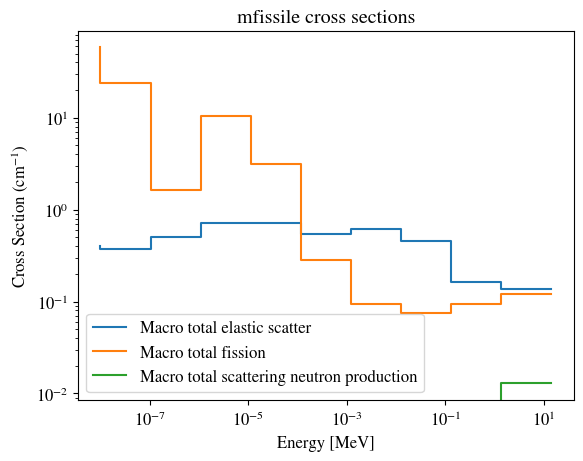

In [20]:
xsreader.xsections['mfissile'].plot(mts=[-3, -6, -16], loglog=True);

Labels can be configured through the `labels` argument

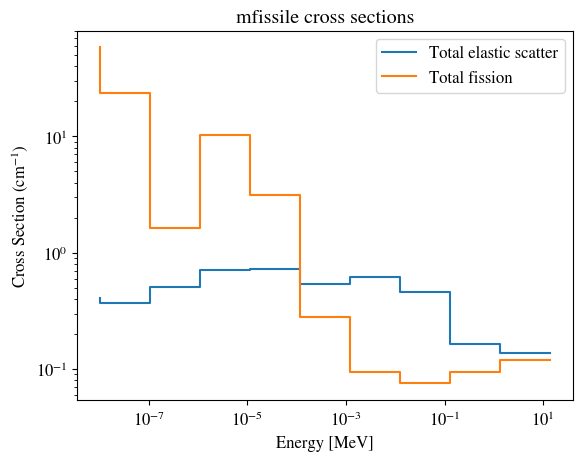

In [21]:
xsreader.xsections['mfissile'].plot(mts=[-3, -6], loglog=True, labels=["Total elastic scatter", "Total fission"]);

## Conclusions
`serpentTools` can plot your Serpent XS data in a friendly way. We're always looking to improve the feel of the code though, so let us know if there are changes you would like.

Keep in mind that setting an energy grid with closer to 10000 points makes far prettier XS plots however. There were none in this example to not clog up the repository.